# Correlating Collaborative State Transitions with Qualitative Outcomes

This notebook presents correlation results between collaborative state transition probablities and qualitative outcomes for each group in the MMLA studies. Collaborative states were identified using KMeans Clustering with 1) EDA and JVA (K = 3), and 2) EDA, JVA and Kinect (K = 4) data. 

In [4]:
#import packages
import sys
sys.path.insert(0, '../src/')
import cluster
import pandas as pd
import numpy as np
from collections import defaultdict
import seaborn as sns
import matplotlib.pyplot as plt

#Markov_trainsition.py
#code by tg12 
#@https://gist.github.com/tg12/d7efa579ceee4afbeaec97eb442a6b72

#the following code takes a list such as
#[1,1,2,6,8,5,5,7,8,8,1,1,4,5,5,0,0,0,1,1,4,4,5,1,3,3,4,5,4,1,1]
#with states labeled as successive integers starting with 0
#and returns a transition matrix, M,
#where M[i][j] is the probability of transitioning from i to j

def transition_matrix(transitions):
    n = 1+ max(transitions) #number of states

    M = [[0]*n for _ in range(n)]

    for (i,j) in zip(transitions,transitions[1:]):
        M[i][j] += 1

    #now convert to probabilities:
    for row in M:
        s = sum(row)
        if s > 0:
            row[:] = [f/s for f in row]
    return M

In [5]:
#read in qualitative outcome data
session = pd.read_csv('../data_master/sessions.csv')
dependent = ['Sustaining Mutual Understanding ', 'Dialogue Management',
             'Information Pooling', 'Reaching Consensus', 'Task Division',
             'Time Managment', 'Technical Coordination', 'Reciprocal Interaction',
             'Individual Task Orientation', 'Collaboration', 'Task Performance',
             'Task Understanding', 'Improvement Over Time', 'Code quality', 'Learning']

In [6]:
def getProb(df, n):
    '''
    Parameters:
    1) df: clustering data frame
    2) n: number of clustered states
    '''
    transition = defaultdict(list) #cache list for transition probablity
    unsuccussful = list()
    for session in df.session.unique(): #for each session in data frame
        df_sub = df[df['session'] == session]
        tMatrix = transition_matrix(df_sub.cluster_label) #compute transition probablity
        #record data in transition
        transition['Session'].append(session) 
        for i in range(n):
            for j in range(n):
                try:
                    prob = tMatrix[i][j]
                    transition[str(i)+'to'+str(j)].append(prob)
                except:
                    transition[str(i)+'to'+str(j)].append(0)
                    if session in unsuccussful:
                        unsuccussful = unsuccussful
                    else:
                        unsuccussful.append(session)
    if len(unsuccussful) == 0:
        return transition #return dictionary with sessions and their corresponding transition probablities
    else: 
        print('Sessions missing 1/1+ cluster labels', unsuccussful) #print sessions without 1/1+ cluster labels
        return transition 

### KMeans Clustering with EDA and JVA (K = 3)

----
PC + JVA

In [7]:
df_pc_jva = pd.read_csv('../data_visualization/PC_JVA_3.csv', index_col='Unnamed: 0')

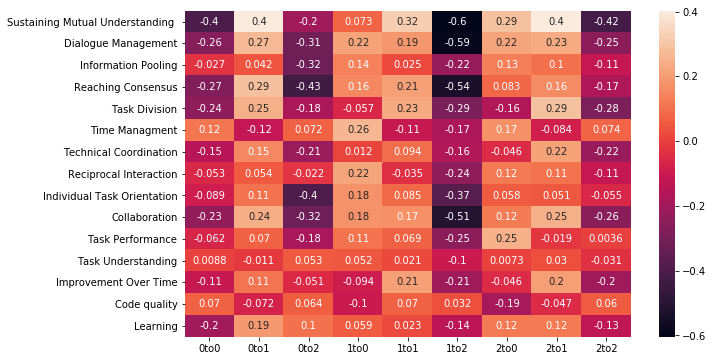

In [8]:
transition_pc_jva = getProb(df_pc_jva, 3)
dfTransition_pc_jva = pd.DataFrame.from_dict(transition_pc_jva)
session_pc_jva = session.merge(dfTransition_pc_jva, on = 'Session', how = 'outer')
independent_pc_jva = dfTransition_pc_jva.columns[1:]
correlations_pc_jva = session_pc_jva.corr()
plt.subplots(figsize=(10,6))
ax = sns.heatmap(correlations_pc_jva.loc[dependent][independent_pc_jva], annot=True)

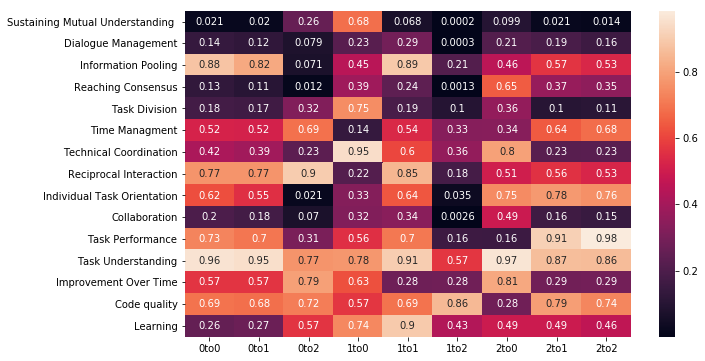

In [9]:
pvalues_pc_jva = cluster.calculate_pvalues(session_pc_jva).astype(float)
plt.subplots(figsize=(10,6))
ax = sns.heatmap(pvalues_pc_jva.loc[dependent][independent_pc_jva], annot=True)

Significant correlations:

1. 0 $\rightarrow$ 0 and sustaining mutual understanding (r = -0.4, p = 0.021)
2. 0 $\rightarrow$ 1 and sustaining mutual understanding (r = 0.4, p = 0.02)
3. 0 $\rightarrow$ 2 and reaching consensus (r = -0.43, p = 0.012)
4. 0 $\rightarrow$ 2 and individual task orientation (r = -0.4, p = 0.021)
5. 1 $\rightarrow$ 2 and sustaining mutual understanding (r = -0.6, p < 0.001)
6. 1 $\rightarrow$ 2 and dialogue management (r = -0.59, p < 0.001)
7. 1 $\rightarrow$ 2 and reaching consensus (r = -0.54, p = 0.001)
8. 1 $\rightarrow$ 2 and individual task orientation (r = -0.37, p = 0.035)
9. 1 $\rightarrow$ 2 and collaboration (r = -0.51, p = 0.003)
10. 2 $\rightarrow$ 1 and sustaining mutual understanding (r = 0.4, p = 0.021)
11. 2 $\rightarrow$ 2 and sustaining mutual understanding (r = -0.42, p =0.014)

----
SM + JVA

In [10]:
df_sm_jva = pd.read_csv('../data_visualization/SM_JVA_3.csv', index_col='Unnamed: 0')

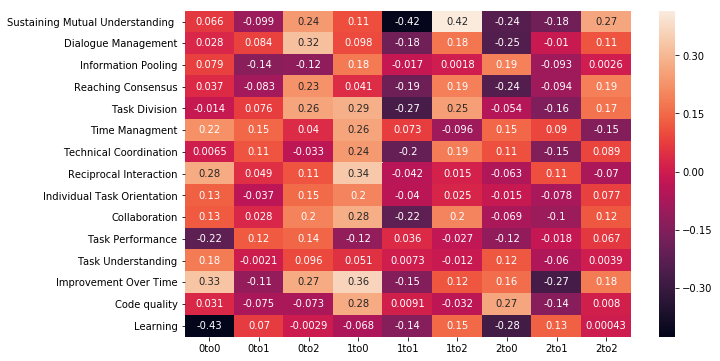

In [11]:
transition_sm_jva = getProb(df_sm_jva, 3)
dfTransition_sm_jva = pd.DataFrame.from_dict(transition_sm_jva)
session_sm_jva = session.merge(dfTransition_sm_jva, on = 'Session', how = 'outer')
independent_sm_jva = dfTransition_sm_jva.columns[1:]
correlations_sm_jva = session_sm_jva.corr()
plt.subplots(figsize=(10,6))
ax = sns.heatmap(correlations_sm_jva.loc[dependent][independent_sm_jva], annot=True)

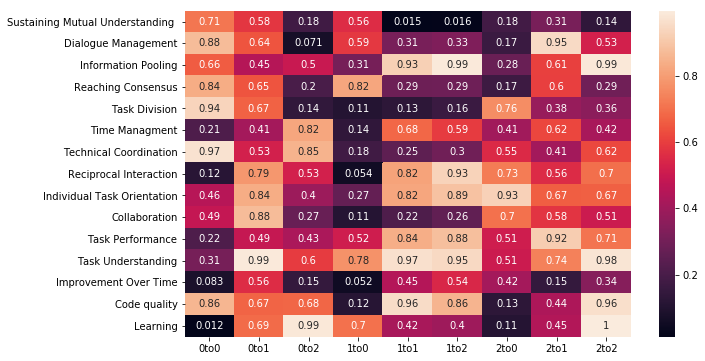

In [12]:
pvalues_sm_jva = cluster.calculate_pvalues(session_sm_jva).astype(float)
plt.subplots(figsize=(10,6))
ax = sns.heatmap(pvalues_sm_jva.loc[dependent][independent_sm_jva], annot=True)

Significant correlations:

1. 0 $\rightarrow$ 0 and learning (r = -0.43, p = 0.012)
2. 1 $\rightarrow$ 1 and sustaining mutual understanding (r = -0.42, p = 0.015)
3. 1 $\rightarrow$ 2 and reaching consensus (r = 0.42, p = 0.016)

----
DA + JVA

In [13]:
df_da_jva = pd.read_csv('../data_visualization/DA_JVA_3.csv', index_col='Unnamed: 0')

Sessions missing 1/1+ cluster labels [4, 16, 27, 28, 34, 35]


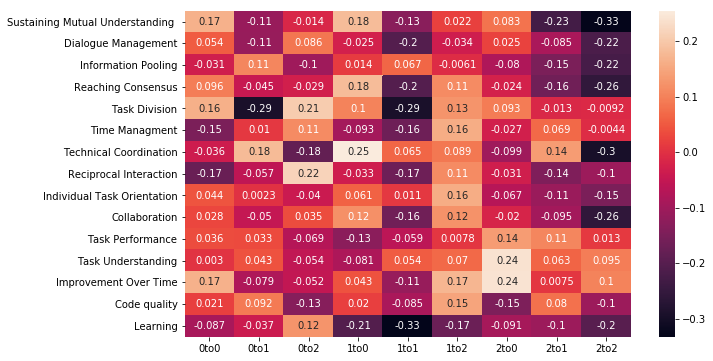

In [14]:
transition_da_jva = getProb(df_da_jva, 3)
dfTransition_da_jva = pd.DataFrame.from_dict(transition_da_jva)
session_da_jva = session.merge(dfTransition_da_jva, on = 'Session', how = 'outer')
independent_da_jva = dfTransition_da_jva.columns[1:]
correlations_da_jva = session_da_jva.corr()
plt.subplots(figsize=(10,6))
ax = sns.heatmap(correlations_da_jva.loc[dependent][independent_da_jva], annot=True)

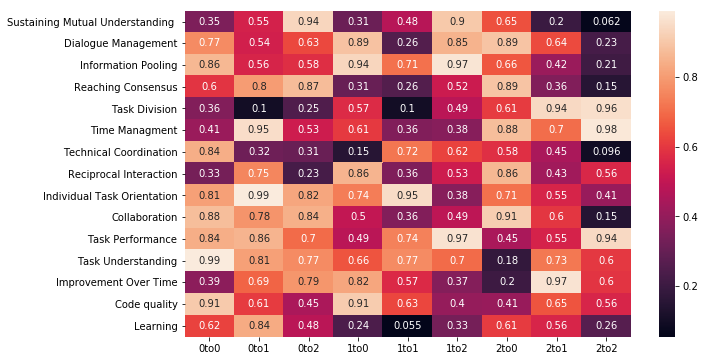

In [15]:
pvalues_da_jva = cluster.calculate_pvalues(session_da_jva).astype(float)
plt.subplots(figsize=(10,6))
ax = sns.heatmap(pvalues_da_jva.loc[dependent][independent_da_jva], annot=True)

No significant correlations observed.

----
IDM + JVA

In [16]:
df_idm_jva = pd.read_csv('../data_visualization/IDM_JVA_3.csv', index_col='Unnamed: 0')

Sessions missing 1/1+ cluster labels [1, 2, 4, 5, 6, 7, 8, 9, 11, 12, 13, 14, 15, 16, 17, 19, 20, 21, 22, 23, 24, 25, 28, 29, 31, 32, 35, 37, 38, 39, 40, 41, 42]


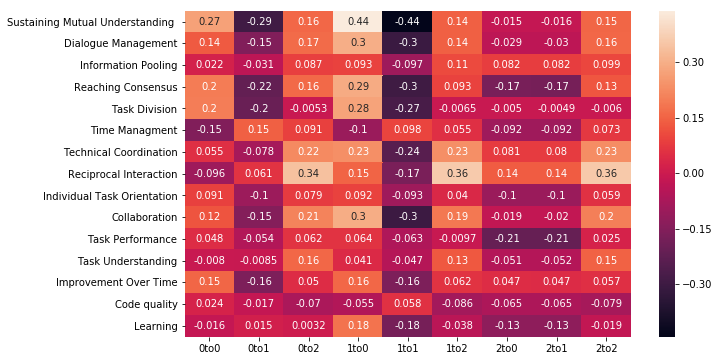

In [17]:
transition_idm_jva = getProb(df_idm_jva, 3)
dfTransition_idm_jva = pd.DataFrame.from_dict(transition_idm_jva)
session_idm_jva = session.merge(dfTransition_idm_jva, on = 'Session', how = 'outer')
independent_idm_jva = dfTransition_idm_jva.columns[1:]
correlations_idm_jva = session_idm_jva.corr()
plt.subplots(figsize=(10,6))
ax = sns.heatmap(correlations_idm_jva.loc[dependent][independent_idm_jva], annot=True)

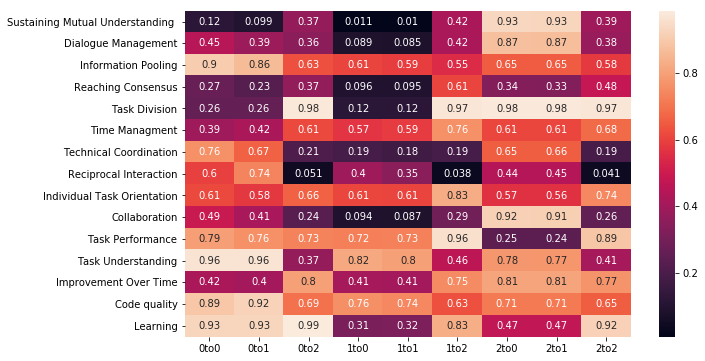

In [18]:
pvalues_idm_jva = cluster.calculate_pvalues(session_idm_jva).astype(float)
plt.subplots(figsize=(10,6))
ax = sns.heatmap(pvalues_idm_jva.loc[dependent][independent_idm_jva], annot=True)

Significant correlations:

1. 1 $\rightarrow$ 0 and sustaining mutual understanding (r = 0.44, p = 0.011)
2. 1 $\rightarrow$ 2 and reciprocal interaction (r = 0.36, p = 0.038)
3. 2 $\rightarrow$ 2 and reciprocal interaction (r = 0.36, p = 0.041)

### KMeans Clustering with EDA, JVA and MoveDiff

----
PC + JVA + MoveDiff

In [19]:
df_pc_jva_movediff = pd.read_csv('../data_visualization/PC_JVA_Kinect_4.csv', index_col='Unnamed: 0')

Sessions missing 1/1+ cluster labels [13]


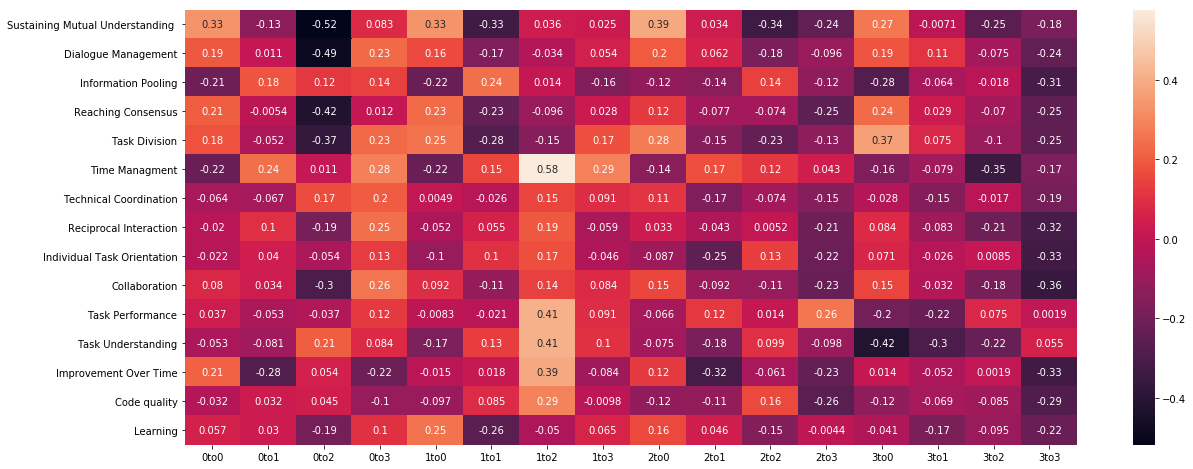

In [20]:
transition_pc_jva_movediff = getProb(df_pc_jva_movediff, 4)
dfTransition_pc_jva_movediff = pd.DataFrame.from_dict(transition_pc_jva_movediff)
session_pc_jva_movediff = session.merge(dfTransition_pc_jva_movediff, on = 'Session', how = 'outer')
independent_pc_jva_movediff = dfTransition_pc_jva_movediff.columns[1:]
correlations_pc_jva_movediff = session_pc_jva_movediff.corr()
plt.subplots(figsize=(20,8))
ax = sns.heatmap(correlations_pc_jva_movediff.loc[dependent][independent_pc_jva_movediff], annot=True)

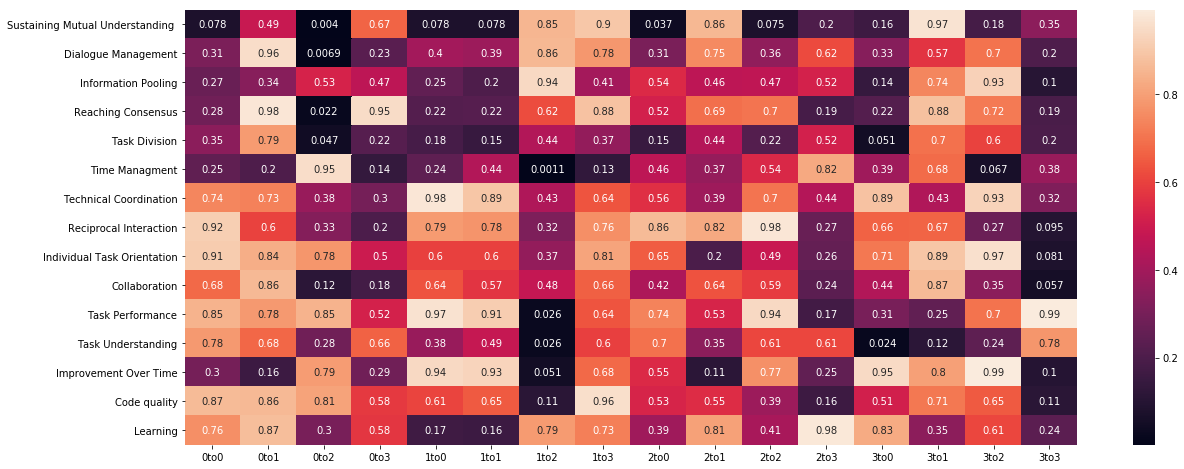

In [21]:
pvalues_pc_jva_movediff = cluster.calculate_pvalues(session_pc_jva_movediff).astype(float)
plt.subplots(figsize=(20,8))
ax = sns.heatmap(pvalues_pc_jva_movediff.loc[dependent][independent_pc_jva_movediff], annot=True)

Significant correlations:

1. 0 $\rightarrow$ 2 and sustaining mutual understanding (r = -0.52, p = 0.004)
2. 0 $\rightarrow$ 2 and dialogue management (r = -0.49, p = 0.007)
3. 0 $\rightarrow$ 2 and reaching consensus (r = -0.42, p = 0.022)
4. 1 $\rightarrow$ 2 and time management (r = 0.58, p = 0.001)
5. 1 $\rightarrow$ 2 and task performance (r = 0.41, p = 0.026)
6. 1 $\rightarrow$ 2 and task understanding (r = 0.41, p = 0.026)
7. 2 $\rightarrow$ 0 and sustaining mutual understanding (r = 0.39, p = 0.037)
8. 3 $\rightarrow$ 0 and task understanding (r = -0.42, p = 0.024)

----
SM + JVA + MoveDiff

In [22]:
df_sm_jva_movediff = pd.read_csv('../data_visualization/SM_JVA_Kinect_4.csv', index_col='Unnamed: 0')

Sessions missing 1/1+ cluster labels [11, 28]


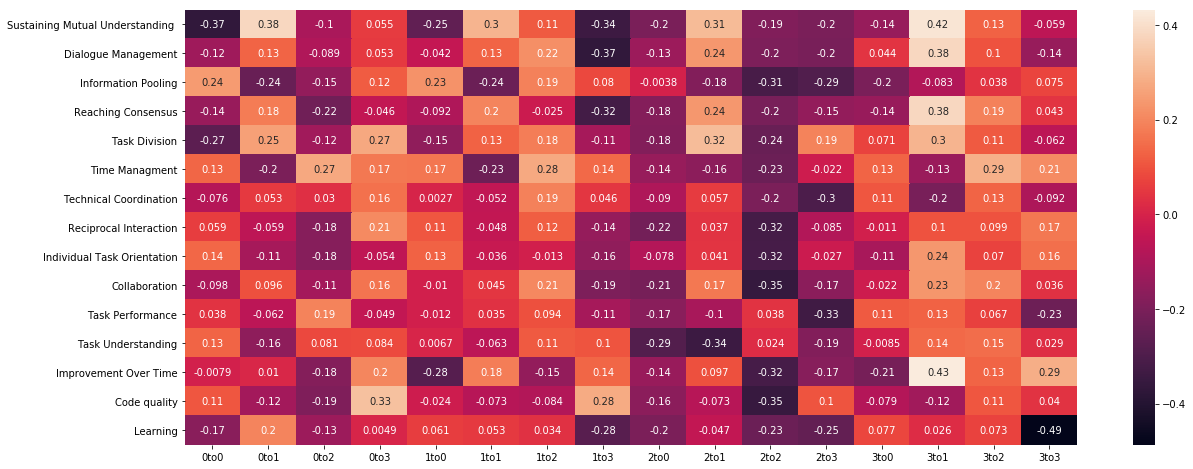

In [23]:
transition_sm_jva_movediff = getProb(df_sm_jva_movediff, 4)
dfTransition_sm_jva_movediff = pd.DataFrame.from_dict(transition_sm_jva_movediff)
session_sm_jva_movediff = session.merge(dfTransition_sm_jva_movediff, on = 'Session', how = 'outer')
independent_sm_jva_movediff = dfTransition_sm_jva_movediff.columns[1:]
correlations_sm_jva_movediff = session_sm_jva_movediff.corr()
plt.subplots(figsize=(20,8))
ax = sns.heatmap(correlations_sm_jva_movediff.loc[dependent][independent_sm_jva_movediff], annot=True)

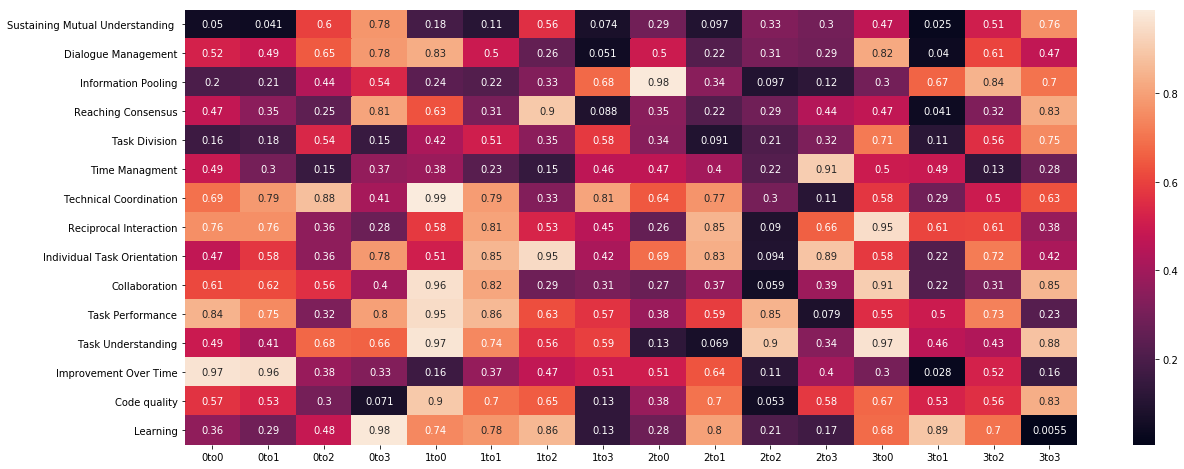

In [24]:
pvalues_sm_jva_movediff = cluster.calculate_pvalues(session_sm_jva_movediff).astype(float)
plt.subplots(figsize=(20,8))
ax = sns.heatmap(pvalues_sm_jva_movediff.loc[dependent][independent_sm_jva_movediff], annot=True)

Significant correlations:

1. 3 $\rightarrow$ 1 and sustaining mutual understanding (r = 0.42, p = 0.025)
2. 3 $\rightarrow$ 1 and dialogue management (r = 0.38, p = 0.04)
3. 3 $\rightarrow$ 1 and reaching consensus (r = 0.38, p = 0.041)
4. 3 $\rightarrow$ 1 and improvement over time (r = 0.43, p = 0.028)
5. 3 $\rightarrow$ 3 and learning (r = -0.49, p = 0.005)

----
DA + JVA + MoveDiff

In [25]:
df_da_jva_movediff = pd.read_csv('../data_visualization/DA_JVA_Kinect_4.csv', index_col='Unnamed: 0')

Sessions missing 1/1+ cluster labels [4, 16, 27, 28, 34, 35]


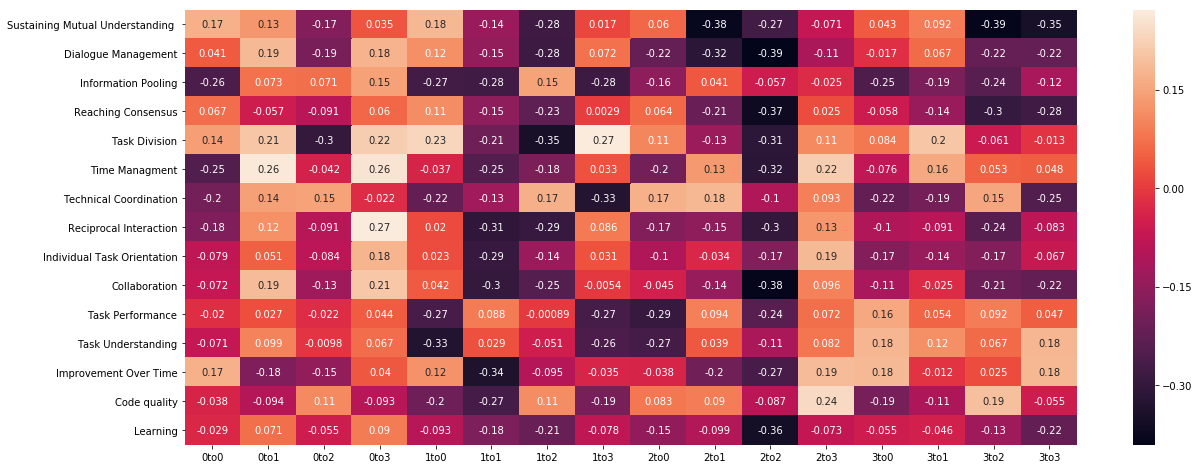

In [26]:
transition_da_jva_movediff = getProb(df_da_jva_movediff, 4)
dfTransition_da_jva_movediff = pd.DataFrame.from_dict(transition_da_jva_movediff)
session_da_jva_movediff = session.merge(dfTransition_da_jva_movediff, on = 'Session', how = 'outer')
independent_da_jva_movediff = dfTransition_da_jva_movediff.columns[1:]
correlations_da_jva_movediff = session_da_jva_movediff.corr()
plt.subplots(figsize=(20,8))
ax = sns.heatmap(correlations_da_jva_movediff.loc[dependent][independent_da_jva_movediff], annot=True)

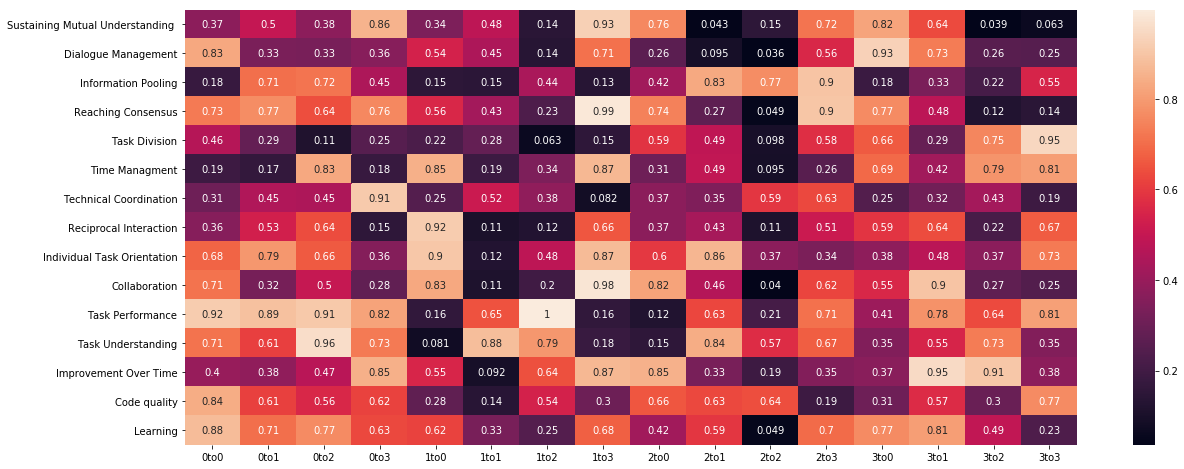

In [27]:
pvalues_da_jva_movediff = cluster.calculate_pvalues(session_da_jva_movediff).astype(float)
plt.subplots(figsize=(20,8))
ax = sns.heatmap(pvalues_da_jva_movediff.loc[dependent][independent_da_jva_movediff], annot=True)

Significant correlations:

1. 2 $\rightarrow$ 1 and sustaining mutual understanding (r = -0.38, p = 0.043)
2. 2 $\rightarrow$ 2 and dialogue management (r = -0.39, p = 0.036)
3. 2 $\rightarrow$ 2 and collaboration (r = -0.38, p = 0.04)
4. 3 $\rightarrow$ 2 and sustaining mutual understanding (r = -0.39, p = 0.039)


----
IDM + JVA + MoveDiff

In [28]:
df_idm_jva_movediff = pd.read_csv('../data_visualization/IDM_JVA_Kinect_4.csv', index_col='Unnamed: 0')

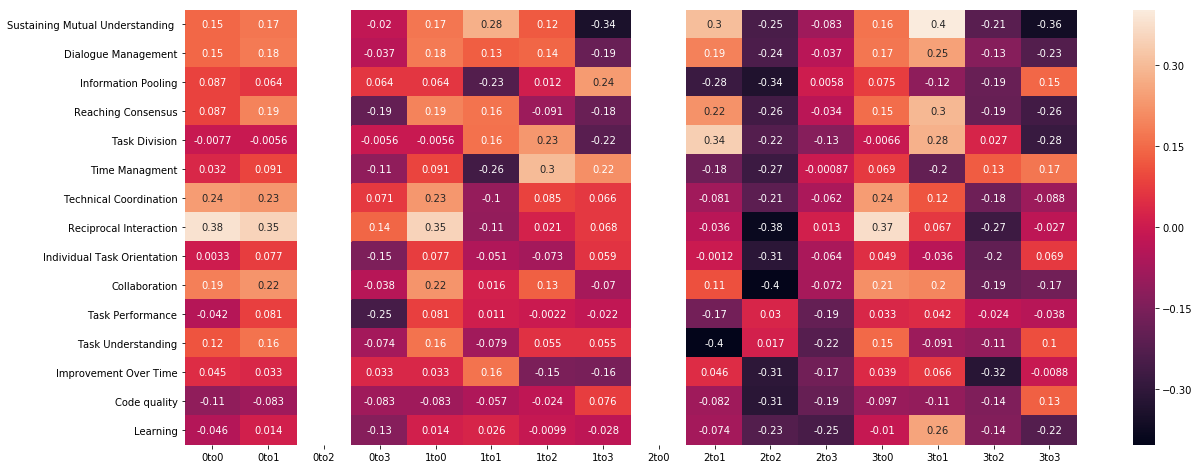

In [29]:
transition_idm_jva_movediff = getProb(df_idm_jva_movediff, 4)
dfTransition_idm_jva_movediff = pd.DataFrame.from_dict(transition_idm_jva_movediff)
session_idm_jva_movediff = session.merge(dfTransition_idm_jva_movediff, on = 'Session', how = 'outer')
independent_idm_jva_movediff = dfTransition_idm_jva_movediff.columns[1:]
correlations_idm_jva_movediff = session_idm_jva_movediff.corr()
plt.subplots(figsize=(20,8))
ax = sns.heatmap(correlations_idm_jva_movediff.loc[dependent][independent_idm_jva_movediff], annot=True)

/Users/KaReeNaaah/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:3010: RuntimeWarning: invalid value encountered in double_scalars
  r = r_num / r_den


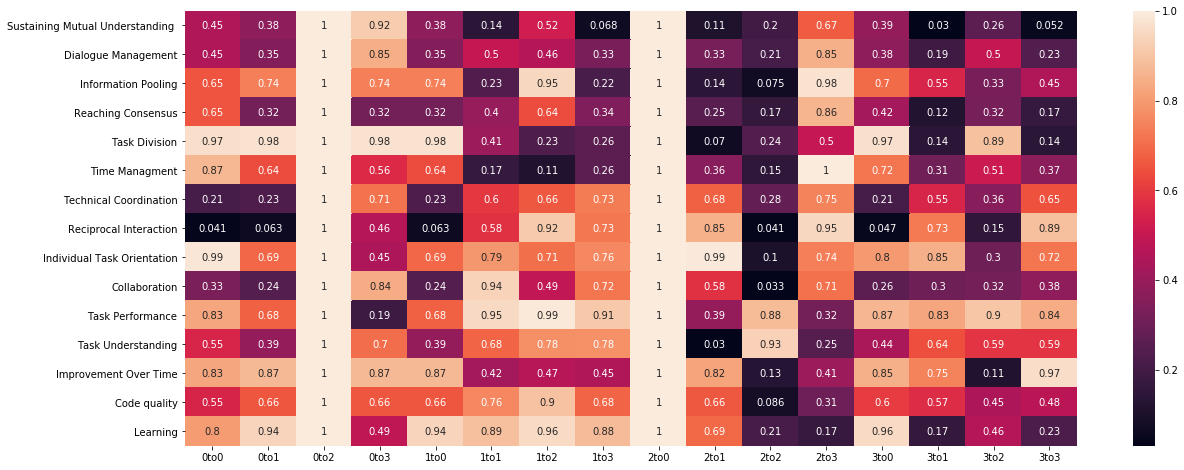

In [30]:
pvalues_idm_jva_movediff = cluster.calculate_pvalues(session_idm_jva_movediff).astype(float)
plt.subplots(figsize=(20,8))
ax = sns.heatmap(pvalues_idm_jva_movediff.loc[dependent][independent_idm_jva_movediff], annot=True)

Significant correlations:

1. 0 $\rightarrow$ 0 and reciprocal interaction (r = 0.38, p = 0.041)
2. 2 $\rightarrow$ 2 and reciprocal interaction (r = -0.38, p = 0.041)
3. 2 $\rightarrow$ 2 and collaboration (r = -0.4, p = 0.033)
4. 3 $\rightarrow$ 1 and sustaining mutual understanding (r = 0.4, p = 0.03)


### KMeans Clustering with EDA, JVA and HeadDiff

----
PC + JVA + HeadDiff

In [31]:
df_pc_jva_headdiff = pd.read_csv('../data_visualization/PC_JVA_HeadDiff_4.csv', index_col='Unnamed: 0')

Sessions missing 1/1+ cluster labels [13]


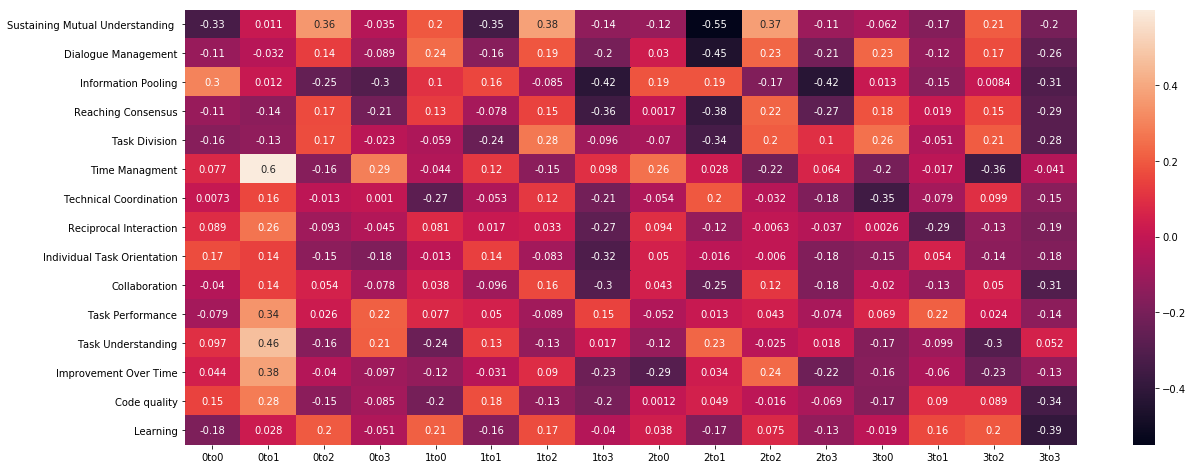

In [32]:
transition_pc_jva_headdiff = getProb(df_pc_jva_headdiff, 4)
dfTransition_pc_jva_headdiff = pd.DataFrame.from_dict(transition_pc_jva_headdiff)
session_pc_jva_headdiff = session.merge(dfTransition_pc_jva_headdiff, on = 'Session', how = 'outer')
independent_pc_jva_headdiff = dfTransition_pc_jva_headdiff.columns[1:]
correlations_pc_jva_headdiff = session_pc_jva_headdiff.corr()
plt.subplots(figsize=(20,8))
ax = sns.heatmap(correlations_pc_jva_headdiff.loc[dependent][independent_pc_jva_headdiff], annot=True)

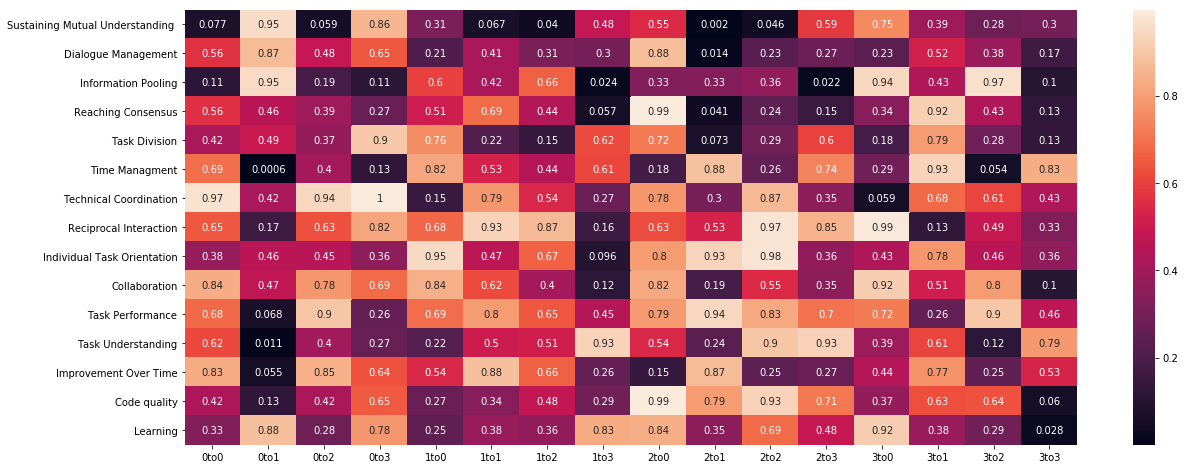

In [33]:
pvalues_pc_jva_headdiff = cluster.calculate_pvalues(session_pc_jva_headdiff).astype(float)
plt.subplots(figsize=(20,8))
ax = sns.heatmap(pvalues_pc_jva_headdiff.loc[dependent][independent_pc_jva_headdiff], annot=True)

Significant correlations:

1. 0 $\rightarrow$ 1 and time management (r = 0.6, p = 0.001)
2. 0 $\rightarrow$ 1 and task understanding (r = 0.46, p = 0.011)
3. 1 $\rightarrow$ 2 and sustaining mutual understanding (r = 0.38, p = 0.04)
4. 1 $\rightarrow$ 3 and information pooling (r = -0.42, p = 0.024)
5. 2 $\rightarrow$ 1 and sustaining mutual understanding (r = -0.55, p = 0.002)
6. 2 $\rightarrow$ 1 and dialogue management (r = -0.45, p = 0.014)
7. 2 $\rightarrow$ 1 and reaching consensus (r = -0.38, p = 0.041)
8. 2 $\rightarrow$ 3 and information pooling (r = -0.42, p = 0.022)
9. 3 $\rightarrow$ 3 and learning (r = -0.39, p = 0.028)


----
SM + JVA + HeadDiff

In [34]:
df_sm_jva_headdiff = pd.read_csv('../data_visualization/SM_JVA_HeadDiff_4.csv', index_col='Unnamed: 0')

Sessions missing 1/1+ cluster labels [11, 28]


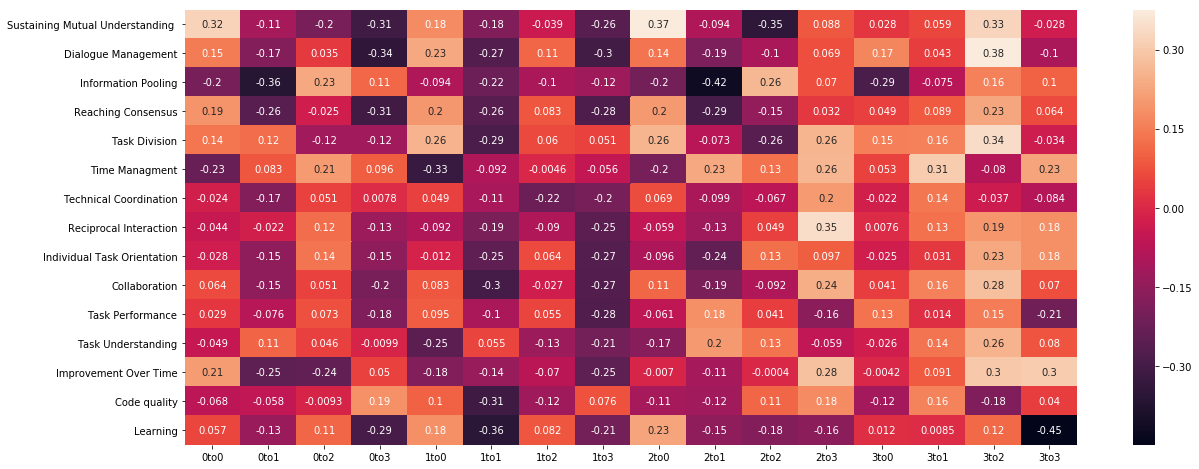

In [35]:
transition_sm_jva_headdiff = getProb(df_sm_jva_headdiff, 4)
dfTransition_sm_jva_headdiff = pd.DataFrame.from_dict(transition_sm_jva_headdiff)
session_sm_jva_headdiff = session.merge(dfTransition_sm_jva_headdiff, on = 'Session', how = 'outer')
independent_sm_jva_headdiff = dfTransition_sm_jva_headdiff.columns[1:]
correlations_sm_jva_headdiff = session_sm_jva_headdiff.corr()
plt.subplots(figsize=(20,8))
ax = sns.heatmap(correlations_sm_jva_headdiff.loc[dependent][independent_sm_jva_headdiff], annot=True)

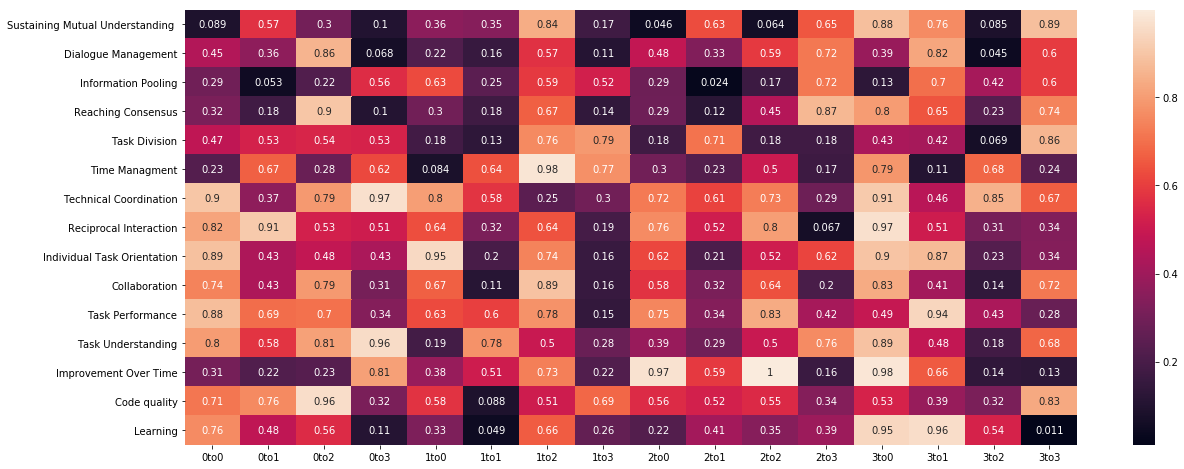

In [33]:
pvalues_sm_jva_headdiff = cluster.calculate_pvalues(session_sm_jva_headdiff).astype(float)
plt.subplots(figsize=(20,8))
ax = sns.heatmap(pvalues_sm_jva_headdiff.loc[dependent][independent_sm_jva_headdiff], annot=True)

Significant correlations:

1. 2 $\rightarrow$ 1 and information pooling (r = -0.42, p = 0.024)
2. 3 $\rightarrow$ 3 and learning (r = -0.45, p = 0.011)


----
DA + JVA + HeadDiff

In [36]:
df_da_jva_headdiff = pd.read_csv('../data_visualization/DA_JVA_HeadDiff_4.csv', index_col='Unnamed: 0')

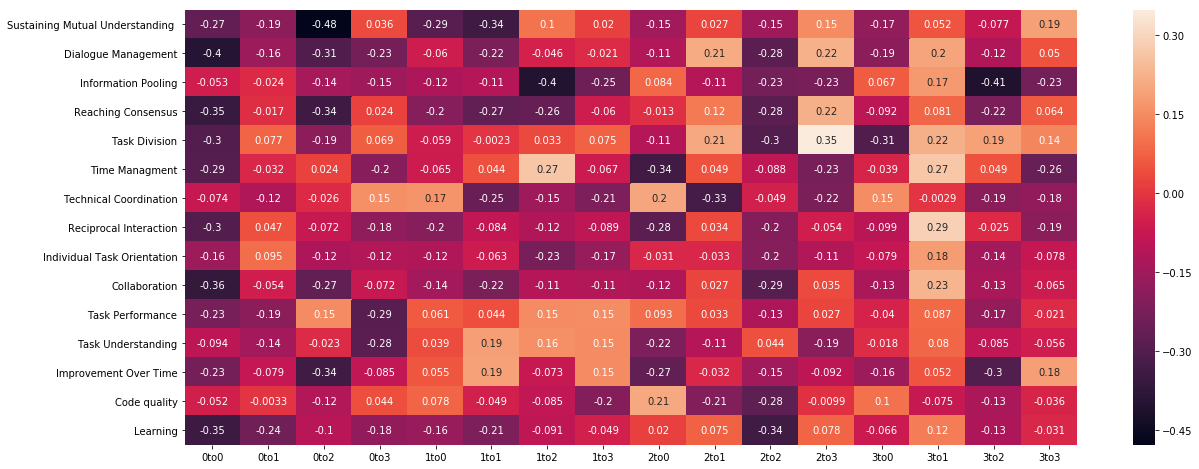

In [37]:
transition_da_jva_headdiff = getProb(df_da_jva_headdiff, 4)
dfTransition_da_jva_headdiff = pd.DataFrame.from_dict(transition_da_jva_headdiff)
session_da_jva_headdiff = session.merge(dfTransition_da_jva_headdiff, on = 'Session', how = 'outer')
independent_da_jva_headdiff = dfTransition_da_jva_headdiff.columns[1:]
correlations_da_jva_headdiff = session_da_jva_headdiff.corr()
plt.subplots(figsize=(20,8))
ax = sns.heatmap(correlations_da_jva_headdiff.loc[dependent][independent_da_jva_headdiff], annot=True)

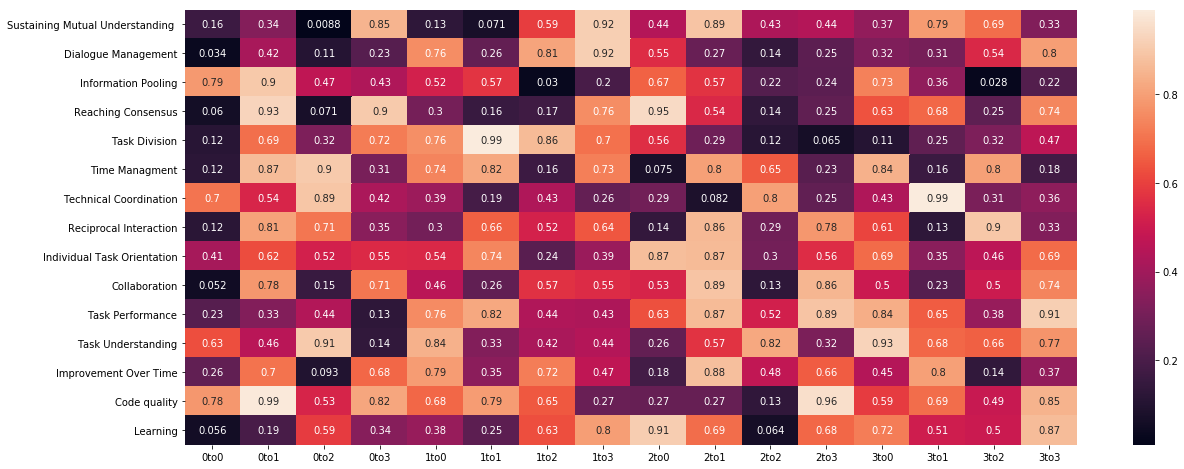

In [38]:
pvalues_da_jva_headdiff = cluster.calculate_pvalues(session_da_jva_headdiff).astype(float)
plt.subplots(figsize=(20,8))
ax = sns.heatmap(pvalues_da_jva_headdiff.loc[dependent][independent_da_jva_headdiff], annot=True)

Significant correlations:

1. 0 $\rightarrow$ 0 and dialogue management (r = -0.4, p = 0.034)
2. 0 $\rightarrow$ 2 and sustaining mutual understanding (r = -0.48, p = 0.009)
3. 1 $\rightarrow$ 2 and information pooling (r = -0.4, p = 0.03)
4. 2 $\rightarrow$ 2 and information pooling (r = -0.41, p = 0.028)

----
IDM + JVA + HeadDiff

In [39]:
df_idm_jva_headdiff = pd.read_csv('../data_visualization/IDM_JVA_HeadDiff_4.csv', index_col='Unnamed: 0')

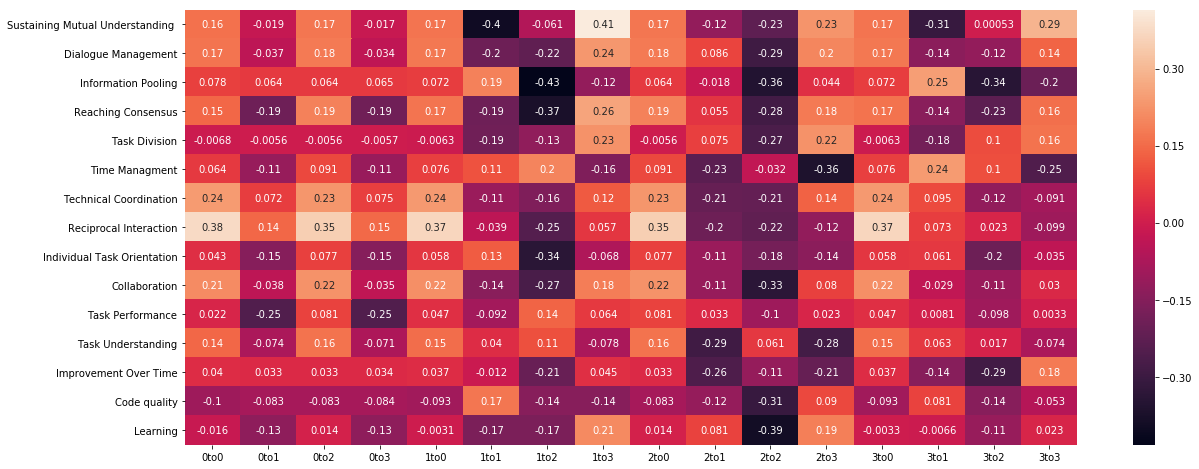

In [40]:
transition_idm_jva_headdiff = getProb(df_idm_jva_headdiff, 4)
dfTransition_idm_jva_headdiff = pd.DataFrame.from_dict(transition_idm_jva_headdiff)
session_idm_jva_headdiff = session.merge(dfTransition_idm_jva_headdiff, on = 'Session', how = 'outer')
independent_idm_jva_headdiff = dfTransition_idm_jva_headdiff.columns[1:]
correlations_idm_jva_headdiff = session_idm_jva_headdiff.corr()
plt.subplots(figsize=(20,8))
ax = sns.heatmap(correlations_idm_jva_headdiff.loc[dependent][independent_idm_jva_headdiff], annot=True)

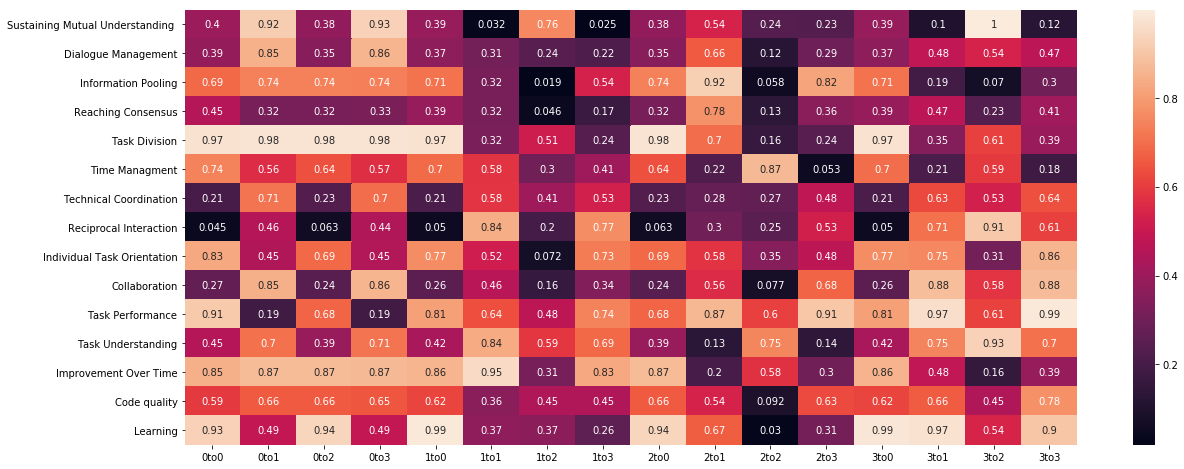

In [41]:
pvalues_idm_jva_headdiff = cluster.calculate_pvalues(session_idm_jva_headdiff).astype(float)
plt.subplots(figsize=(20,8))
ax = sns.heatmap(pvalues_idm_jva_headdiff.loc[dependent][independent_idm_jva_headdiff], annot=True)

Significant correlations:

1. 1 $\rightarrow$ 1 and sustaining mutual understanding (r = -0.4, p = 0.032)
2. 1 $\rightarrow$ 2 and information pooling (r = -0.43, p = 0.019)
3. 1 $\rightarrow$ 3 and sustaining mutual understanding (r = 0.41, p = 0.025)
4. 2 $\rightarrow$ 2 and learning (r = -0.39, p = 0.03)

### KMeans Clustering with EDA, JVA and ShoulderDiff

----
PC + JVA + ShoulderDiff

In [42]:
df_pc_jva_shoulderdiff = pd.read_csv('../data_visualization/PC_JVA_ShoulderDiff_4.csv', index_col='Unnamed: 0')

Sessions missing 1/1+ cluster labels [13]


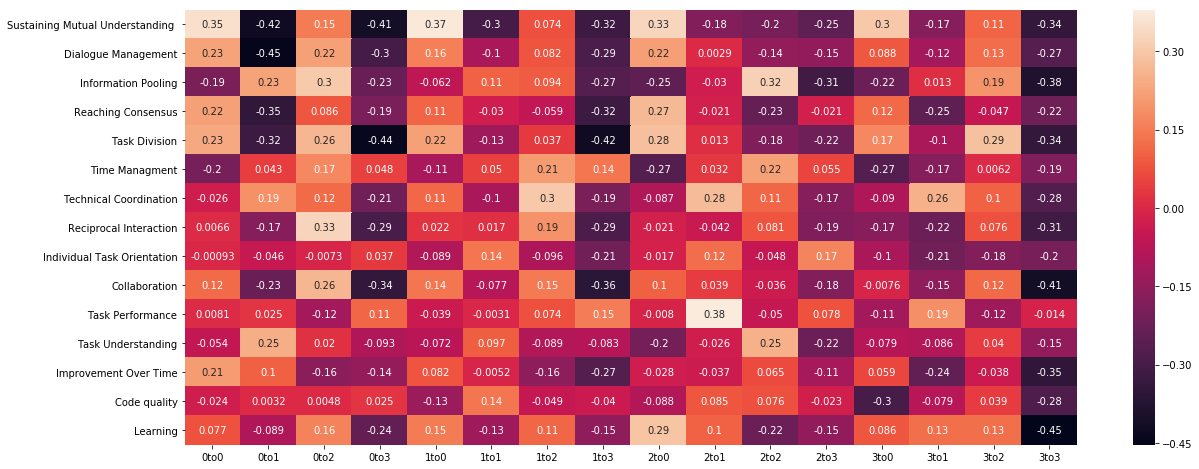

In [43]:
transition_pc_jva_shoulderdiff = getProb(df_pc_jva_shoulderdiff, 4)
dfTransition_pc_jva_shoulderdiff = pd.DataFrame.from_dict(transition_pc_jva_shoulderdiff)
session_pc_jva_shoulderdiff = session.merge(dfTransition_pc_jva_shoulderdiff, on = 'Session', how = 'outer')
independent_pc_jva_shoulderdiff = dfTransition_pc_jva_shoulderdiff.columns[1:]
correlations_pc_jva_shoulderdiff = session_pc_jva_shoulderdiff.corr()
plt.subplots(figsize=(20,8))
ax = sns.heatmap(correlations_pc_jva_shoulderdiff.loc[dependent][independent_pc_jva_shoulderdiff], annot=True)

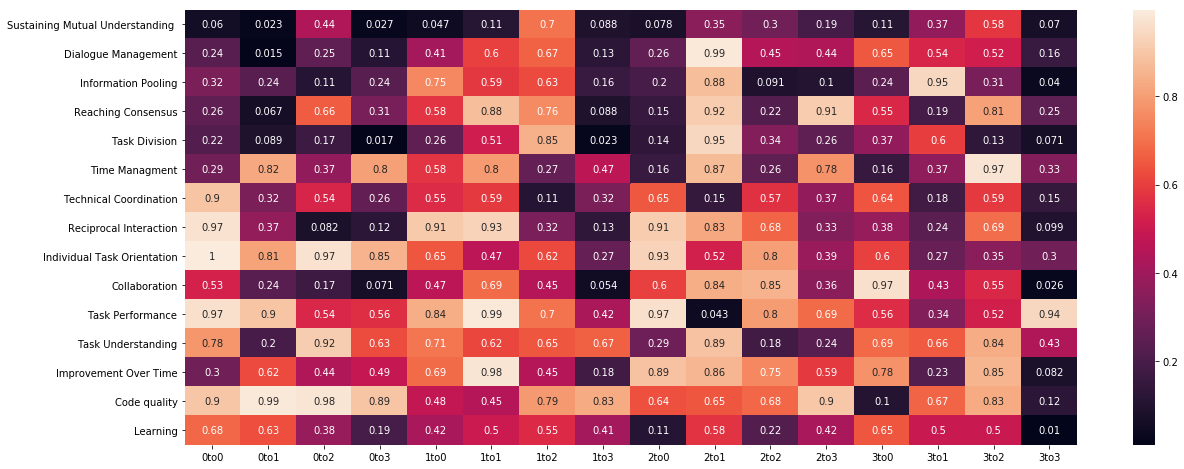

In [44]:
pvalues_pc_jva_shoulderdiff = cluster.calculate_pvalues(session_pc_jva_shoulderdiff).astype(float)
plt.subplots(figsize=(20,8))
ax = sns.heatmap(pvalues_pc_jva_shoulderdiff.loc[dependent][independent_pc_jva_shoulderdiff], annot=True)

Significant correlations:

1. 0 $\rightarrow$ 1 and sustaining mutual understanding (r = -0.42, p = 0.023)
2. 0 $\rightarrow$ 1 and dialogue management (r = -0.45, p = 0.015)
3. 0 $\rightarrow$ 3 and sustaining mutual understanding (r = -0.41, p = 0.027)
4. 0 $\rightarrow$ 3 and task division (r = -0.44, p = 0.017)
5. 1 $\rightarrow$ 3 and sustaining mutual understanding (r = -0.42, p = 0.023)
6. 2 $\rightarrow$ 1 and task performance (r = 0.38, p = 0.043)
7. 3 $\rightarrow$ 3 and information pooling (r = -0.38, p = 0.04)
8. 3 $\rightarrow$ 3 and collaboration (r = -0.41, p = 0.026)
9. 3 $\rightarrow$ 3 and learning (r = -0.45, p = 0.01)


----
SM + JVA + ShoulderDiff

In [45]:
df_sm_jva_shoulderdiff = pd.read_csv('../data_visualization/SM_JVA_ShoulderDiff_4.csv', index_col='Unnamed: 0')

Sessions missing 1/1+ cluster labels [13]


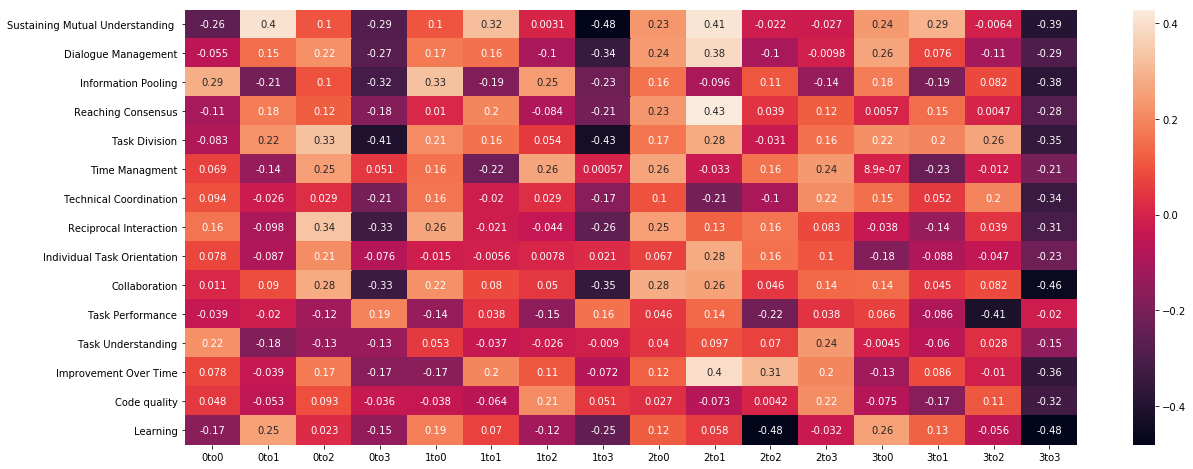

In [46]:
transition_sm_jva_shoulderdiff = getProb(df_sm_jva_shoulderdiff, 4)
dfTransition_sm_jva_shoulderdiff = pd.DataFrame.from_dict(transition_sm_jva_shoulderdiff)
session_sm_jva_shoulderdiff = session.merge(dfTransition_sm_jva_shoulderdiff, on = 'Session', how = 'outer')
independent_sm_jva_shoulderdiff = dfTransition_sm_jva_shoulderdiff.columns[1:]
correlations_sm_jva_shoulderdiff = session_sm_jva_shoulderdiff.corr()
plt.subplots(figsize=(20,8))
ax = sns.heatmap(correlations_sm_jva_shoulderdiff.loc[dependent][independent_sm_jva_shoulderdiff], annot=True)

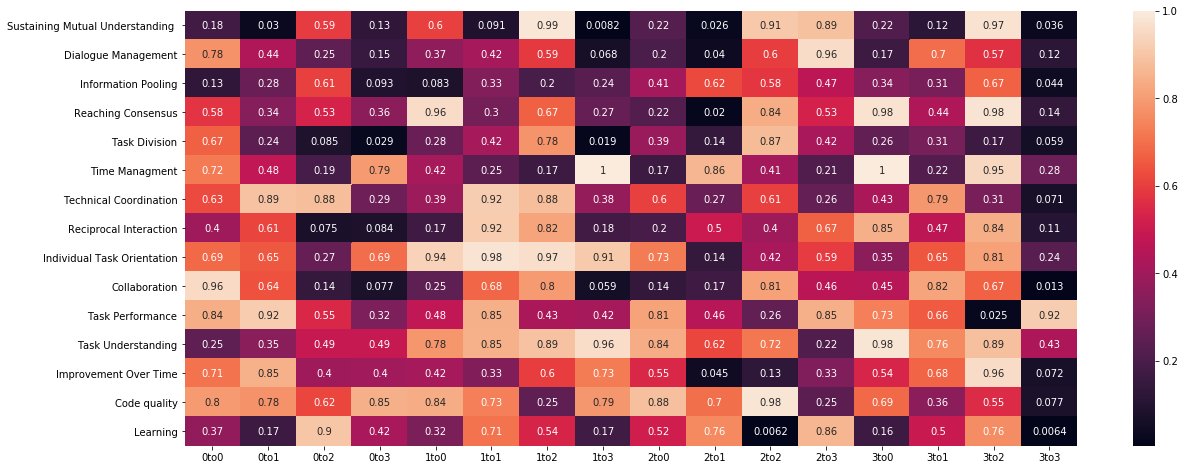

In [47]:
pvalues_sm_jva_shoulderdiff = cluster.calculate_pvalues(session_sm_jva_shoulderdiff).astype(float)
plt.subplots(figsize=(20,8))
ax = sns.heatmap(pvalues_sm_jva_shoulderdiff.loc[dependent][independent_sm_jva_shoulderdiff], annot=True)

Significant correlations:

1. 0 $\rightarrow$ 1 and sustaining mutual understanding (r = 0.4, p = 0.03)
2. 0 $\rightarrow$ 3 and task division (r = -0.41, p = 0.029)
3. 1 $\rightarrow$ 3 and sustaining mutual understanding (r = -0.48, p = 0.008)
4. 2 $\rightarrow$ 1 and sustaining mutual understanding (r = 0.41, p = 0.026)
5. 2 $\rightarrow$ 1 and dialogue management (r = 0.38, p = 0.04)
6. 2 $\rightarrow$ 1 and reaching consensus (r = 0.43, p = 0.02)
7. 2 $\rightarrow$ 2 and learning (r = -0.48, p = 0.006)
8. 3 $\rightarrow$ 2 and task performance (r = -0.41, p = 0.025)
9. 3 $\rightarrow$ 3 and sustaining mutual understanding (r = -0.39, p = 0.036)
10. 3 $\rightarrow$ 3 and information pooling (r = -0.38, p = 0.044)
11. 3 $\rightarrow$ 3 and collaboration (r = -0.46, p = 0.013)
12. 3 $\rightarrow$ 3 and learning (r = -0.48, p = 0.006)


----
DA + JVA + ShoulderDiff

In [48]:
df_da_jva_shoulderdiff = pd.read_csv('../data_visualization/DA_JVA_ShoulderDiff_4.csv', index_col='Unnamed: 0')

Sessions missing 1/1+ cluster labels [13]


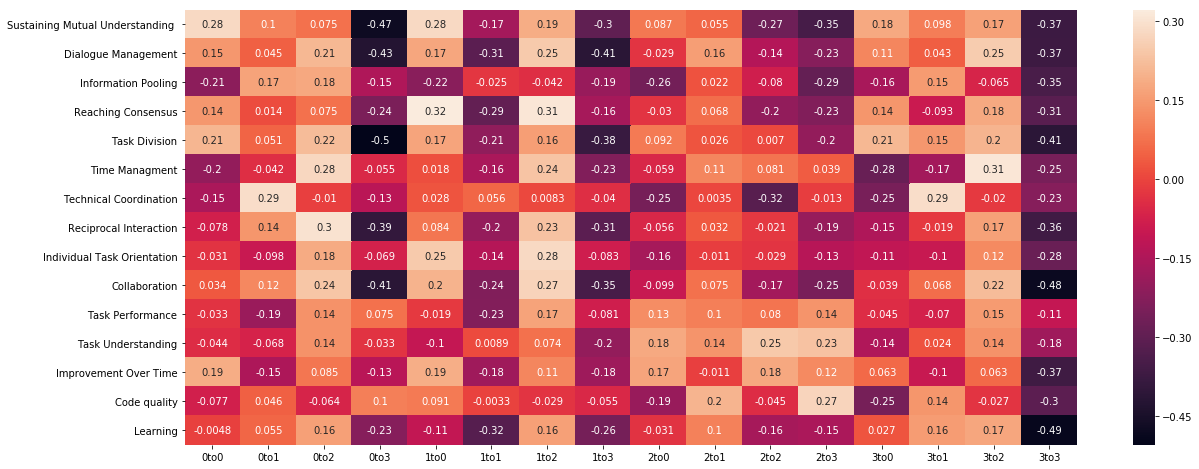

In [49]:
transition_da_jva_shoulderdiff = getProb(df_da_jva_shoulderdiff, 4)
dfTransition_da_jva_shoulderdiff = pd.DataFrame.from_dict(transition_da_jva_shoulderdiff)
session_da_jva_shoulderdiff = session.merge(dfTransition_da_jva_shoulderdiff, on = 'Session', how = 'outer')
independent_da_jva_shoulderdiff = dfTransition_da_jva_shoulderdiff.columns[1:]
correlations_da_jva_shoulderdiff = session_da_jva_shoulderdiff.corr()
plt.subplots(figsize=(20,8))
ax = sns.heatmap(correlations_da_jva_shoulderdiff.loc[dependent][independent_da_jva_shoulderdiff], annot=True)

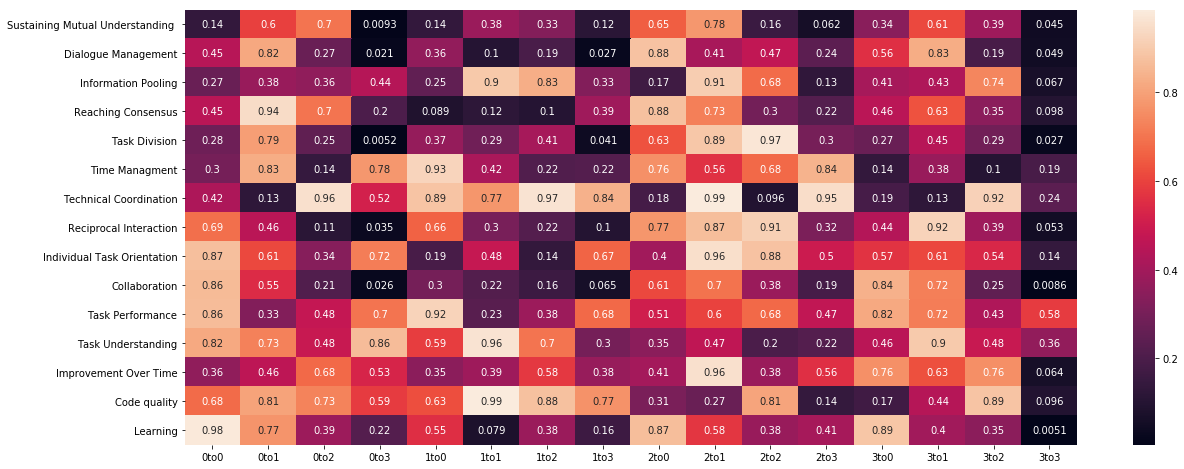

In [50]:
pvalues_da_jva_shoulderdiff = cluster.calculate_pvalues(session_da_jva_shoulderdiff).astype(float)
plt.subplots(figsize=(20,8))
ax = sns.heatmap(pvalues_da_jva_shoulderdiff.loc[dependent][independent_da_jva_shoulderdiff], annot=True)

Significant correlations:

1. 0 $\rightarrow$ 3 and sustaining mutual understanding (r = -0.47, p = 0.001)
2. 0 $\rightarrow$ 3 and dialogue management (r = -0.43, p = 0.021)
3. 0 $\rightarrow$ 3 and task division (r = -0.5, p = 0.005)
4. 0 $\rightarrow$ 3 and reciprocal interaction (r = -0.39, p = 0.035)
5. 0 $\rightarrow$ 3 and collaboration (r = -0.41, p = 0.026)
6. 1 $\rightarrow$ 3 and dialogue management (r = -0.41, p = 0.027)
7. 1 $\rightarrow$ 3 and task division (r = -0.38, p = 0.041)
8. 3 $\rightarrow$ 3 and task division (r = -0.41, p = 0.027)
9. 3 $\rightarrow$ 3 and collaboration (r = -0.48, p = 0.009)

----
IDM + JVA + ShoulderDiff

In [51]:
df_idm_jva_shoulderdiff = pd.read_csv('../data_visualization/IDM_JVA_ShoulderDiff_4.csv', index_col='Unnamed: 0')

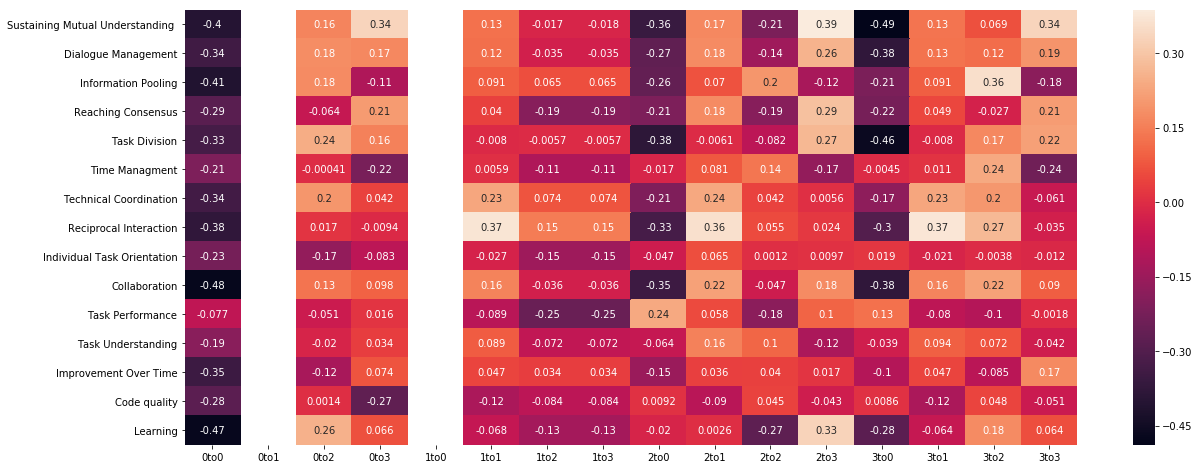

In [52]:
transition_idm_jva_shoulderdiff = getProb(df_idm_jva_shoulderdiff, 4)
dfTransition_idm_jva_shoulderdiff = pd.DataFrame.from_dict(transition_idm_jva_shoulderdiff)
session_idm_jva_shoulderdiff = session.merge(dfTransition_idm_jva_shoulderdiff, on = 'Session', how = 'outer')
independent_idm_jva_shoulderdiff = dfTransition_idm_jva_shoulderdiff.columns[1:]
correlations_idm_jva_shoulderdiff = session_idm_jva_shoulderdiff.corr()
plt.subplots(figsize=(20,8))
ax = sns.heatmap(correlations_idm_jva_shoulderdiff.loc[dependent][independent_idm_jva_shoulderdiff], annot=True)

/Users/KaReeNaaah/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:3010: RuntimeWarning: invalid value encountered in double_scalars
  r = r_num / r_den


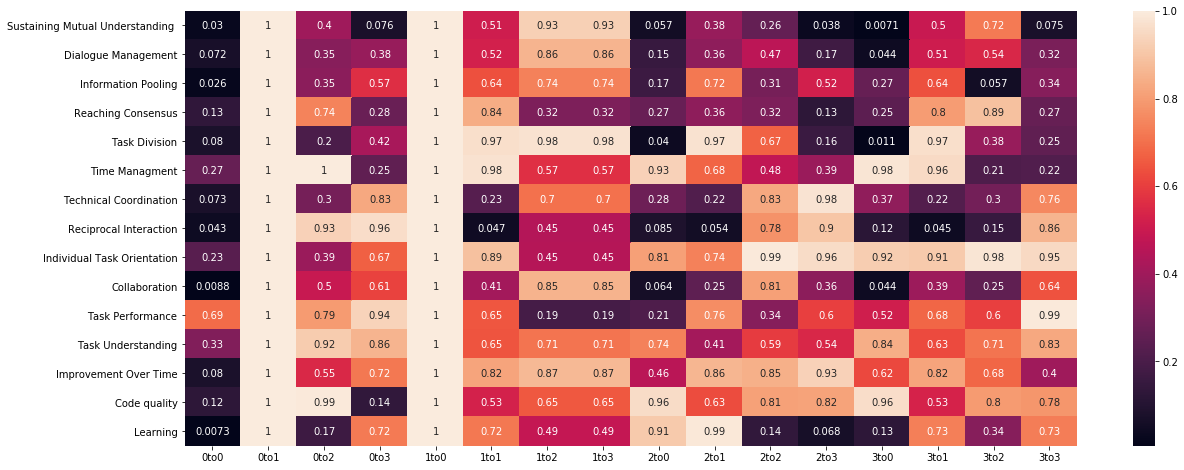

In [53]:
pvalues_idm_jva_shoulderdiff = cluster.calculate_pvalues(session_idm_jva_shoulderdiff).astype(float)
plt.subplots(figsize=(20,8))
ax = sns.heatmap(pvalues_idm_jva_shoulderdiff.loc[dependent][independent_idm_jva_shoulderdiff], annot=True)

Significant correlations:

1. 0 $\rightarrow$ 0 and sustaining mutual understanding (r = -0.4, p = 0.03)
2. 0 $\rightarrow$ 0 and information pooling (r = -0.41, p = 0.026)
3. 0 $\rightarrow$ 0 and reciprocal interaction (r = -0.38, p = 0.043)
4. 0 $\rightarrow$ 0 and collaboration (r = -0.48, p = 0.009)
5. 0 $\rightarrow$ 0 and learning (r = -0.47, p = 0.007)
6. 2 $\rightarrow$ 0 and task division (r = -0.38, p = 0.04)
7. 2 $\rightarrow$ 3 and sustaining mutual understanding (r = 0.39, p = 0.038)
8. 3 $\rightarrow$ 0 and sustaining mutual understanding (r = -0.49, p = 0.007)
9. 3 $\rightarrow$ 0 and dialogue management (r = -0.38, p = 0.044)
10. 3 $\rightarrow$ 0 and task division (r = -0.46, p = 0.011)
11. 3 $\rightarrow$ 0 and collaboration (r = -0.38, p = 0.044)


### KMeans Clustering with EDA, JVA and Kinect All

----
PC + JVA + Kinect All

In [54]:
df_pc_jva_kinect_all = pd.read_csv('../data_visualization/PC_JVA_Kinect_all_4.csv', index_col='Unnamed: 0')

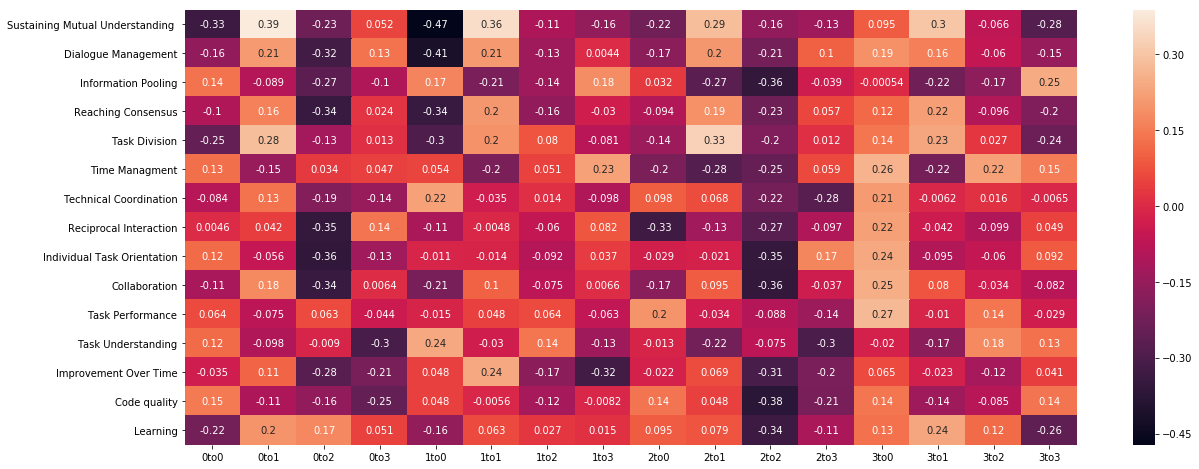

In [55]:
transition_pc_jva_kinect_all = getProb(df_pc_jva_kinect_all, 4)
dfTransition_pc_jva_kinect_all = pd.DataFrame.from_dict(transition_pc_jva_kinect_all)
session_pc_jva_kinect_all = session.merge(dfTransition_pc_jva_kinect_all, on = 'Session', how = 'outer')
independent_pc_jva_kinect_all = dfTransition_pc_jva_kinect_all.columns[1:]
correlations_pc_jva_kinect_all = session_pc_jva_kinect_all.corr()
plt.subplots(figsize=(20,8))
ax = sns.heatmap(correlations_pc_jva_kinect_all.loc[dependent][independent_pc_jva_kinect_all], annot=True)

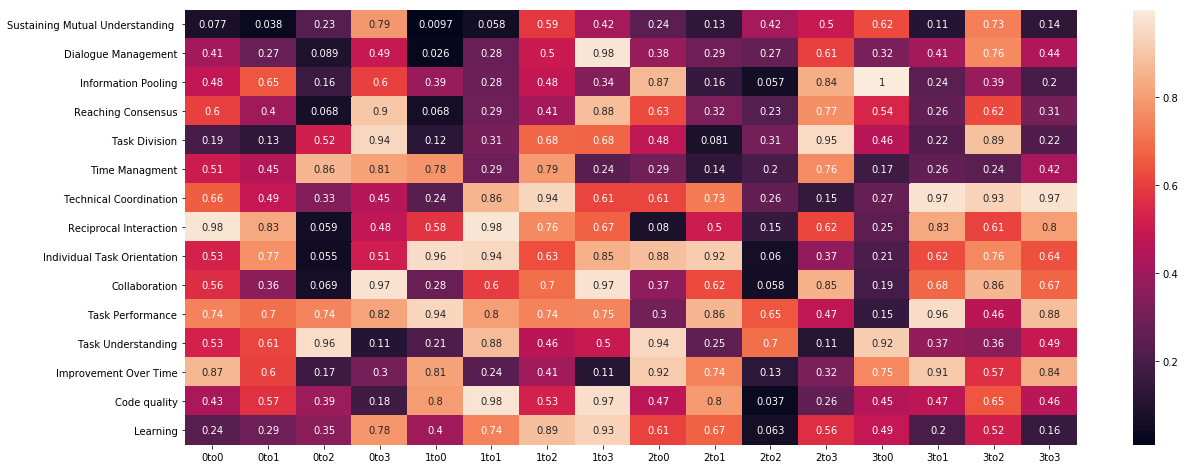

In [56]:
pvalues_pc_jva_kinect_all = cluster.calculate_pvalues(session_pc_jva_kinect_all).astype(float)
plt.subplots(figsize=(20,8))
ax = sns.heatmap(pvalues_pc_jva_kinect_all.loc[dependent][independent_pc_jva_kinect_all], annot=True)

Significant correlations:

1. 0 $\rightarrow$ 1 and sustaining mutual understanding (r = 0.39, p = 0.038)
2. 1 $\rightarrow$ 0 and sustaining mutual understanding (r = -0.47, p = 0.010)
3. 1 $\rightarrow$ 1 and dialogue management (r = -0.41, p = 0.026)
4. 2 $\rightarrow$ 2 and code quality (r = -0.38, p = 0.038)

----
SM + JVA + Kinect All

In [57]:
df_sm_jva_kinect_all = pd.read_csv('../data_visualization/SM_JVA_Kinect_all_4.csv', index_col='Unnamed: 0')

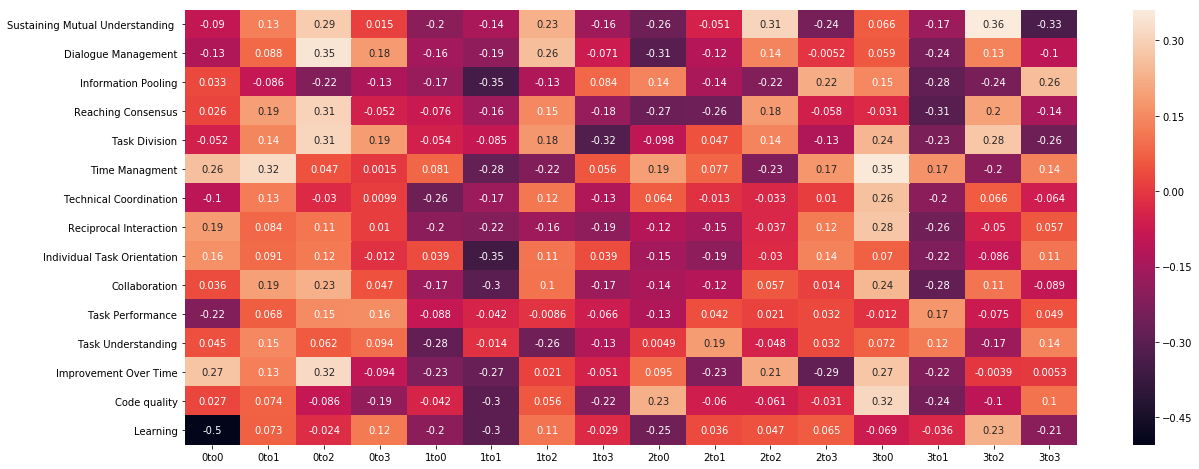

In [58]:
transition_sm_jva_kinect_all = getProb(df_sm_jva_kinect_all, 4)
dfTransition_sm_jva_kinect_all = pd.DataFrame.from_dict(transition_sm_jva_kinect_all)
session_sm_jva_kinect_all = session.merge(dfTransition_sm_jva_kinect_all, on = 'Session', how = 'outer')
independent_sm_jva_kinect_all = dfTransition_sm_jva_kinect_all.columns[1:]
correlations_sm_jva_kinect_all = session_sm_jva_kinect_all.corr()
plt.subplots(figsize=(20,8))
ax = sns.heatmap(correlations_sm_jva_kinect_all.loc[dependent][independent_sm_jva_kinect_all], annot=True)

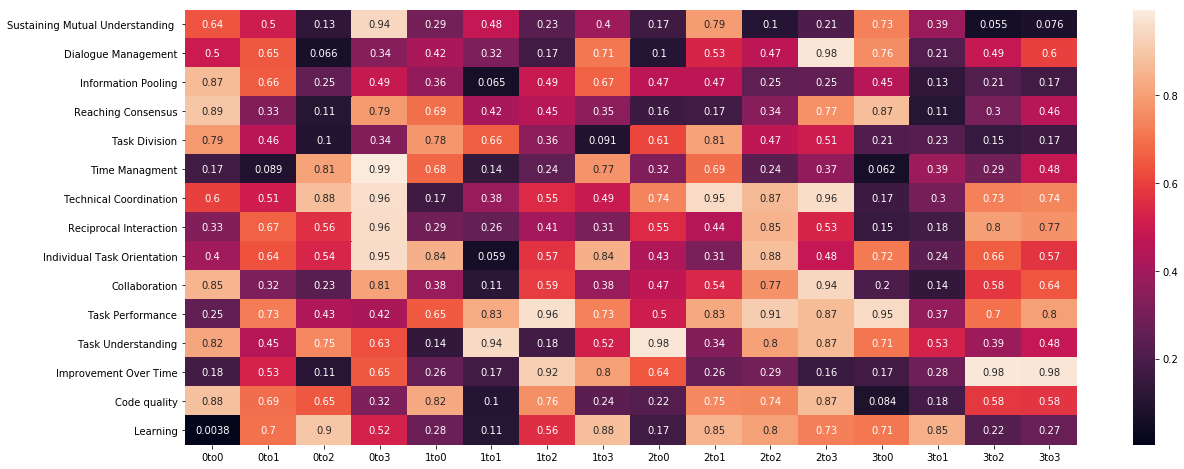

In [59]:
pvalues_sm_jva_kinect_all = cluster.calculate_pvalues(session_sm_jva_kinect_all).astype(float)
plt.subplots(figsize=(20,8))
ax = sns.heatmap(pvalues_sm_jva_kinect_all.loc[dependent][independent_sm_jva_kinect_all], annot=True)

Significant correlations:

1. 0 $\rightarrow$ 0 and learning (r = -0.5, p = 0.004)

----
DA + JVA + Kinect All

In [60]:
df_da_jva_kinect_all = pd.read_csv('../data_visualization/DA_JVA_Kinect_all_4.csv', index_col='Unnamed: 0')

Sessions missing 1/1+ cluster labels [13]


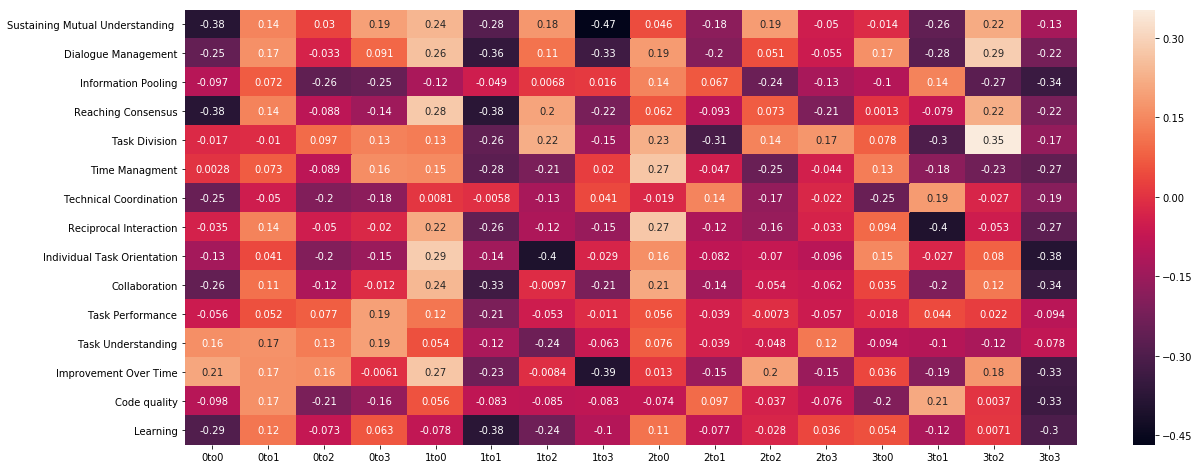

In [61]:
transition_da_jva_kinect_all = getProb(df_da_jva_kinect_all, 4)
dfTransition_da_jva_kinect_all = pd.DataFrame.from_dict(transition_da_jva_kinect_all)
session_da_jva_kinect_all = session.merge(dfTransition_da_jva_kinect_all, on = 'Session', how = 'outer')
independent_da_jva_kinect_all = dfTransition_da_jva_kinect_all.columns[1:]
correlations_da_jva_kinect_all = session_da_jva_kinect_all.corr()
plt.subplots(figsize=(20,8))
ax = sns.heatmap(correlations_da_jva_kinect_all.loc[dependent][independent_da_jva_kinect_all], annot=True)

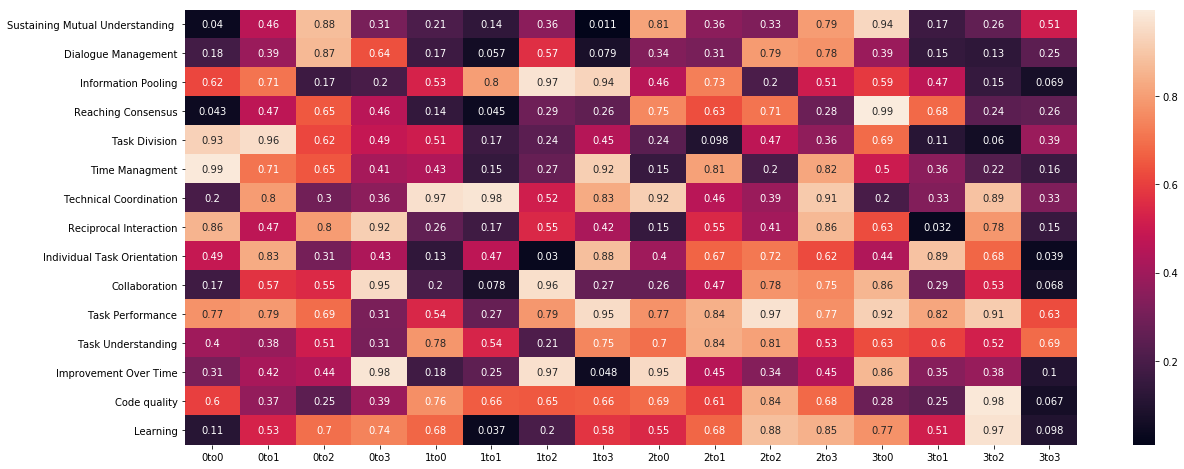

In [62]:
pvalues_da_jva_kinect_all = cluster.calculate_pvalues(session_da_jva_kinect_all).astype(float)
plt.subplots(figsize=(20,8))
ax = sns.heatmap(pvalues_da_jva_kinect_all.loc[dependent][independent_da_jva_kinect_all], annot=True)

Significant correlations:

1. 0 $\rightarrow$ 0 and sustaining mutual understanding (r = -0.38, p = 0.04)
2. 0 $\rightarrow$ 0 and reaching consensus (r = -0.38, p = 0.043)
3. 1 $\rightarrow$ 1 and learning (r = -0.38, p = 0.037)
4. 1 $\rightarrow$ 2 and individual task orientation (r = -0.4, p = 0.03)
5. 1 $\rightarrow$ 3 and sustaining mutual understanding (r = -0.47, p = 0.011)
6. 3 $\rightarrow$ 1 and reciprocal interaction (r = -0.4, p = 0.032)
7. 3 $\rightarrow$ 3 and individual task orientation (r = -0.38, p = 0.039)

----
IDM + JVA + Kinect All

In [63]:
df_idm_jva_kinect_all = pd.read_csv('../data_visualization/IDM_JVA_Kinect_all_4.csv', index_col='Unnamed: 0')

Sessions missing 1/1+ cluster labels [8, 11, 13, 15, 16, 17, 20, 21, 24, 25, 28, 29, 37, 38, 40]


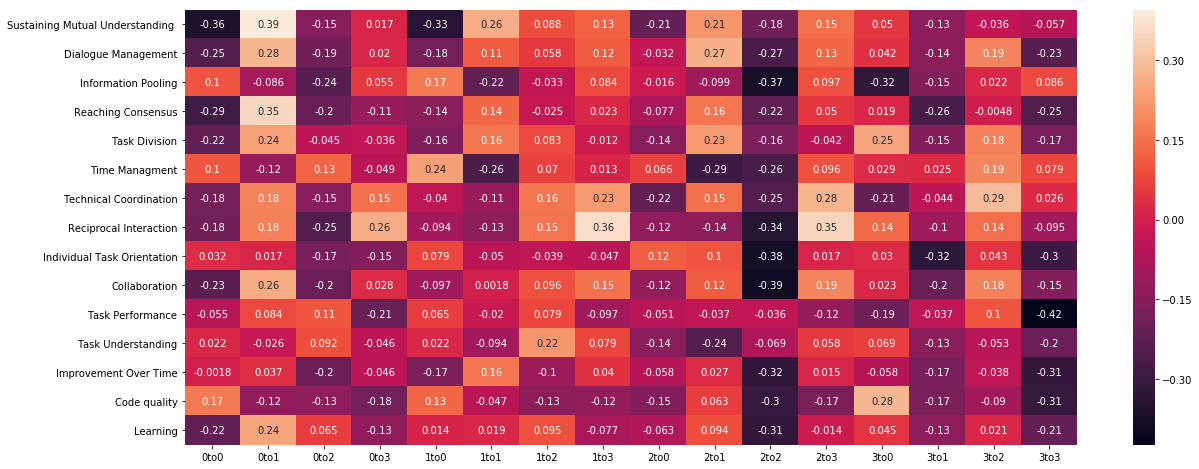

In [64]:
transition_idm_jva_kinect_all = getProb(df_idm_jva_kinect_all, 4)
dfTransition_idm_jva_kinect_all = pd.DataFrame.from_dict(transition_idm_jva_kinect_all)
session_idm_jva_kinect_all = session.merge(dfTransition_idm_jva_kinect_all, on = 'Session', how = 'outer')
independent_idm_jva_kinect_all = dfTransition_idm_jva_kinect_all.columns[1:]
correlations_idm_jva_kinect_all = session_idm_jva_kinect_all.corr()
plt.subplots(figsize=(20,8))
ax = sns.heatmap(correlations_idm_jva_kinect_all.loc[dependent][independent_idm_jva_kinect_all], annot=True)

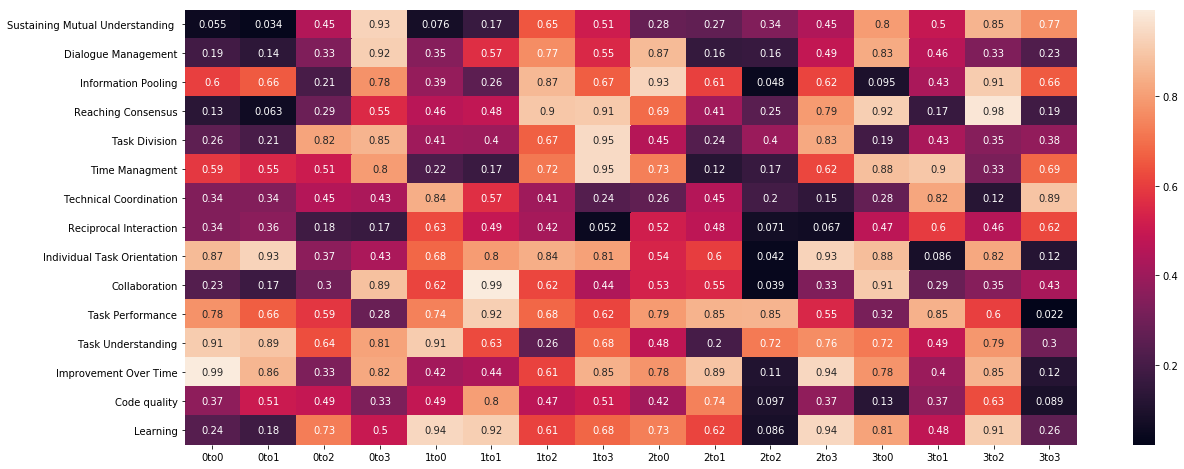

In [65]:
pvalues_idm_jva_kinect_all = cluster.calculate_pvalues(session_idm_jva_kinect_all).astype(float)
plt.subplots(figsize=(20,8))
ax = sns.heatmap(pvalues_idm_jva_kinect_all.loc[dependent][independent_idm_jva_kinect_all], annot=True)

Significant correlations:

1. 0 $\rightarrow$ 1 and sustaining mutual understanding (r = 0.39, p = 0.034)
2. 2 $\rightarrow$ 2 and individual task orientation (r = -0.38, p = 0.042)
3. 2 $\rightarrow$ 2 and collaboration (r = -0.39, p = 0.039)
4. 3 $\rightarrow$ 3 and task performance (r = -0.42, p = 0.022)